### Salish Sea Nutrients
Examining SSAM nutient availability for phytoplankton with an eye to udnerstanding nutrient limitation in the surface

In [1]:
import arrow
import os
from datetime import datetime, timedelta
import itertools
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely.geometry as sgeom
import xarray as xr
import ssam_groups as groups
from cartopy import crs, feature
from pathlib import Path
from IPython.display import Image
from shapely.geometry import MultiPoint
from mpl_toolkits.axes_grid1 import make_axes_locatable

from salishsea_tools import data_tools, places, nc_tools, wind_tools

In [2]:
#control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/MPRI-1/highres-control-3y/outputSalishSea.nc"
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Control/v6719_14y_20250703/outputSalishSea.nc"
control = xr.open_dataset(str(control_file), decode_cf=True) #.resample(t='1M').mean()

In [10]:
ssam_N_tbl = control.NO3[:, groups.salish_sea, 6] + control.NH3[:, groups.salish_sea, 6] # surface only
ssam_N_t = ssam_N_tbl.mean(axis=(1))

In [14]:
ssam_NO3_tbl = control.NO3[:, groups.salish_sea, 6] # surface only
ssam_NO3_t = ssam_NO3_tbl.mean(axis=(1))

ssam_NH3_tbl =  control.NH3[:, groups.salish_sea, 6] 
ssam_NH3_t = ssam_NH3_tbl.mean(axis=(1))

In [11]:
ssam_N_monthly_mean = ssam_N_t.groupby("t.month").mean("t")
ssam_N_std = ssam_N_t.groupby("t.month").std("t")

In [15]:
ssam_NO3_monthly_mean = ssam_NO3_t.groupby("t.month").mean("t")
ssam_NO3_std = ssam_NO3_t.groupby("t.month").std("t")

ssam_NH3_monthly_mean = ssam_NH3_t.groupby("t.month").mean("t")
ssam_NH3_std = ssam_NH3_t.groupby("t.month").std("t")

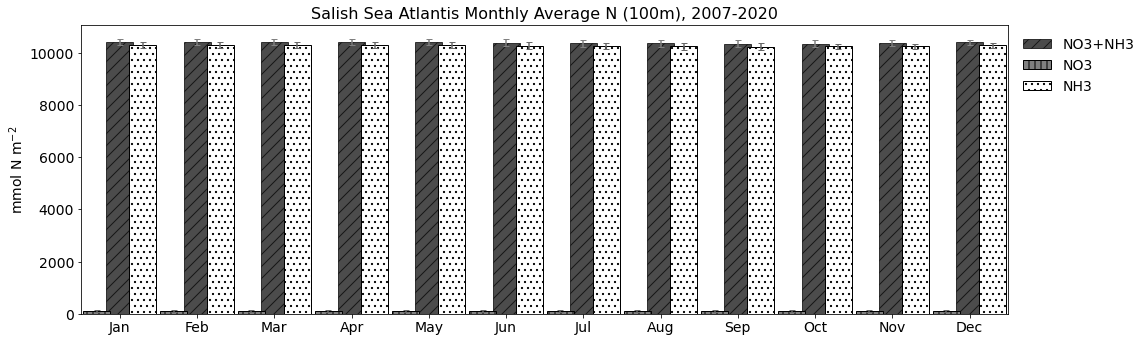

In [31]:
fig, ax = plt.subplots(figsize=(14, 5))

fig.tight_layout(pad=2.5)

bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 1}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=np.arange(len(ssam_N_monthly_mean)) 

width=0.35

ax.bar(xticks, ssam_N_monthly_mean,width,yerr=ssam_N_std,color='k',ecolor='grey',edgecolor='k',hatch='//',alpha=0.7,capsize=3,label='NO3+NH3') 
ax.bar(xticks-0.3, ssam_NO3_monthly_mean,width,yerr=ssam_NO3_std,color='grey',ecolor='dimgrey',edgecolor='k',hatch='||',capsize=3,label='NO3') 
ax.bar(xticks+0.3, ssam_NH3_monthly_mean,width,yerr=ssam_NH3_std,color='white',ecolor='dimgrey',edgecolor='k',hatch='..',capsize=3,label='NH3') 
ax.set_title('Salish Sea Atlantis Monthly Average N (100m), 2007-2020',fontsize=16)
ax.legend(frameon=False,loc=1,fontsize=14,bbox_to_anchor=(1.15, 1))
#ax.set_ylim(0,50)
ax.set_xlim(-.5,11.5)
ax.set_ylabel('mmol N m$^{-2}$',fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xticks(xticks)
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"));

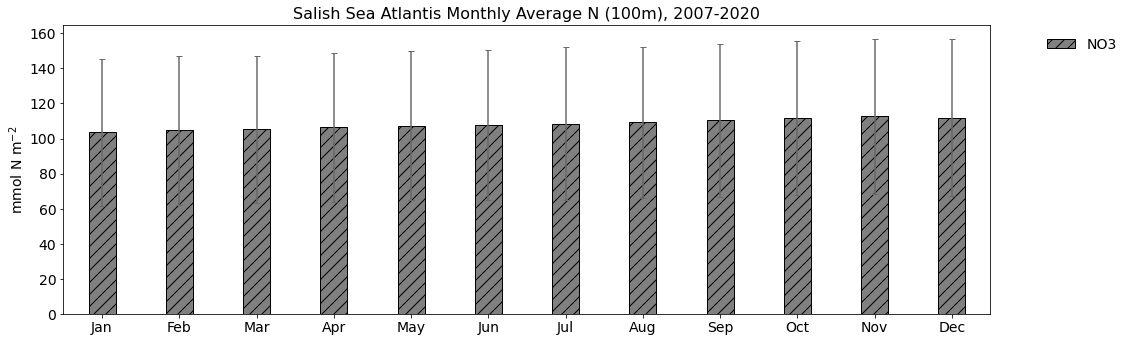

In [34]:
fig, ax = plt.subplots(figsize=(14, 5))

fig.tight_layout(pad=2.5)

bbox = {'boxstyle': 'round', 'facecolor': 'w', 'alpha': 1}
cmap = plt.get_cmap('tab10')
palette = [cmap(0), cmap(0.2), 'k', cmap(0.1), cmap(0.3)]
xticks=np.arange(len(ssam_N_monthly_mean)) 

width=0.35

ax.bar(xticks, ssam_NO3_monthly_mean,width,yerr=ssam_NO3_std,color='grey',ecolor='dimgrey',edgecolor='k',hatch='//',capsize=3,label='NO3') 
ax.set_title('Salish Sea Atlantis Monthly Average N (100m), 2007-2020',fontsize=16)
ax.legend(frameon=False,loc=1,fontsize=14,bbox_to_anchor=(1.15, 1))
#ax.set_ylim(0,50)
ax.set_xlim(-.5,11.5)
ax.set_ylabel('mmol N m$^{-2}$',fontsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_xticks(xticks)
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov',"Dec"));